**3.1 Введение**

Описательная статистика помогает упростить большие объемы данных существенным образом. В отличие от логической статистики, которая будет представлена в следующей главе, в описательной статистике мы не делаем выводов за пределами данных, которые мы анализируем; мы не можем делать никаких заключений в соответствии с гипотезами, которые можем выдвинуть. Мы не пытаемся определить характеристики «популяции» (см. ниже) исходя из имеющихся данных, но обращаемся к настоящему количественному описанию в управляемой форме. Это просто способ описания данных.

 

Статистика, в частности описательная статистика, основана на двух основных понятиях:

• популяция - это совокупность объектов, предметов («единиц»), о которых запрашивается информация;

• выборка — это часть популяции, которая рассматривается

 

Описательная статистика применяет понятия, меры и термины, которые используются для описания основных характеристик образцов в исследовании. Эти процедуры необходимы для предоставления сводных данных об образцах в качестве приблизительного значения популяции.
Вместе с простыми графиками они составляют основу каждого количественного анализа данных. Чтобы описать данные выборки и сделать вывод, мы должны пройти несколько этапов:

 

1. Подготовка данных: получив определённый образец, мы должны подготовить данные для образования статистически обоснованных описаний.
2. Описательная статистика: генерирует различные статистики для описания и суммирования данных кратко и оценивает различные пути их рассмотрения.

**3.2 Подготовка данных**

Одной из первых задач при анализе данных, является сбор и подготовка данных в формате, подходящем для анализа образцов. Наиболее распространенные этапы подготовки данных включают следующие операции.

1. Получение данных: данные могут быть прочитаны непосредственно из файла, или они могут быть получены, путём поиска в сети. 

2. Анализ данных: Правильная процедура анализа зависит от формата данных: простой текст, фиксированные столбцы, CSV, XML, HTML и т. д.

3. Очистка данных: ответы на опрос и другие файлы данных почти всегда неполны. Иногда существует несколько кодов для таких вещей, такие как, не запрашиваемые, неизвестные и на которые нет ответа. И ошибки почти всегда есть. Простая стратегия - удалить или игнорировать неполные записи.

4. Построение структур данных: После того, как вы прочитали данные, необходимо сохранить их в структуру данных, которая позволит подвергнуть их анализу, в котором мы заинтересованы.  Если данные помещаются в память, построение структуры данных обычно является способом, которым нужно пользоваться. Если нет, то обычно создается база данных, которая внешней базой данных. Большинство баз данных обеспечивают сопоставление ключей и значений, поэтому они служат словарями.

**3.2.1 Взрослый пример**

Давайте рассмотрим общедоступную базу данных под названием «Adult data», размещенную в репозитории машинного обучения UCI. Она содержит приблизительно 32 000 наблюдений, касающихся различных финансовых параметров, связанных с населением США: возраст, пол, семейное положение (семейное положение человека), страна, доход (булева переменная: человек ли зарабатывает более 50 000 долларов США в год), образование (самый высокий уровень образования, достигнутый человеком), профессия, прирост капитала и т. д.

Мы покажем, что можем исследовать данные, задав такие вопросы, как: «Вероятнее ли мужчины становятся профессионалами с высоким уровнем дохода, чем женщины, т. е. доход более 50 000 долларов в год?»

Во-первых, давайте прочитаем данные:

In [1]:
file = open("../input/adult-data-5/train_data.csv", "r")
def chr_int(a):
    if a.isdigit(): return int(a) 
    else: return 0
data = []
for line in file:
     data1 = line.split(', ') 
     if len(data1) == 15:
        data.append([chr_int(data1[0]), data1[1], chr_int(data1[2]), data1[3], chr_int(data1[4]), data1[5], data1[6], data1[7], data1[8], data1[9], chr_int(data1[10]), chr_int(data1[11]), chr_int(data1[12]), data1[13], data1[14] ])

Проверяя данные, получаем:

In [2]:
print (data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


Одним из самых простых способов управления данными в Python является использование структуры DataFrame, определенной в библиотеке Pandas, которая представляет собой двумерную, изменяемую по размеру, потенциально неоднородную структуру табличных данных с маркированными осями:

In [3]:
import pandas as pd
df = pd.DataFrame(data) 
df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hr_per_week', 'country', 'income']

Команда shape даёт точное количество данных образцов данных (в данном случае в строках) и объектов (в столбцах):

In [4]:
df.shape

(32561, 15)

Таким образом, мы видим, что наш набор данных содержит 32 561 запись данных с 15 объектами в каждой. Давайте посчитаем количество записей на страну:

In [5]:
counts = df.groupby('country').size() 
print (counts.head())

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


В первой строке показано количество выборок с неизвестной страной, а затем количество выборок, соответствующих первым странам в наборе данных.
Давайте разделим людей по полу на две группы: мужчины и женщины.

In [6]:
ml = df[(df.sex == 'Male')]

Если мы ориентируемся на профессионалов с высоким доходом, разделенных по полу, то можно сделать:

In [7]:
ml1 = df[(df.sex == 'Male') & (df.income=='>50K\n') ]
fm = df[(df.sex == 'Female')]
fm1 = df[(df.sex == 'Female') & (df.income=='>50K\n')]

**3.3 Исследовательский анализ данных**

Данные, полученные при выполнении определенного измерения по всем объектам в выборке, отражают наши наблюдения для одной характеристики, такой как страна, возраст, образование и т. д. Эти измерения и категории представляют выборочное распределение переменной, которая в свою очередь приблизительно представляет распределение популяции переменной. Одной из главных целей исследовательского анализа данных является визуализация и суммирование распределения выборки, тем самым позволяя нам сделать предварительные предположения о распределении популяции.

**3. 3. 1. Суммирование данных**

Данные в целом могут быть категориальными или количественными. Для категориальных данных табулирование частоты каждой категории является наилучшим не-графическим исследованием для анализа данных. Например, мы можем спросить себя — какова доля профессионалов с высоким доходом в нашей базе данных:

In [8]:
df1 = df[(df.income=='>50K\n')]
print ('The rate of people with high income is: ', int(len(df1)/float(len(df))*100), '%.')
print ('The rate of men with high income is: ', int(len(ml1)/float(len(ml))*100), '%.')
print ('The rate of women with high income is: ', int(len(fm1)/float(len(fm))*100), '%.')

The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


Учитывая количественную переменную, исследовательский анализ данных позволяет сделать предварительные оценки популяционного распределения переменной, используя данные рассматриваемых выборок. Характеристиками популяционного распределения количественной переменной являются её среднее значение, отклонение, гистограммы, выбросы и т. д. Наши наблюдаемые данные представляют собой лишь конечный набор выборок из зачастую бесконечного числа возможных выборок. Характеристики наших случайным образом рассматриваемых выборок интересны только в той степени, в которой они представляют совокупность данных, из которых они получены.

**3.3.1.1 Среднее**

Одним из первых измерений, которые мы используем, чтобы взглянуть на данные, является получение выборочной статистики из данных, такой как выборочное среднее. Учитывая выборку из n значений, {xi}, i = 1,. , , , n, среднее значение, μ, является суммой значений, деленной на количество значений, другими словами:

![3.1](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/1.png?raw=true)

Термины «mean» и «average» - взаимозаменяемы. Фактически, главное различие между ними в том, что «mean» среднее значение выборки — сводная статистика, рассчитанная по формуле (3.1), в то время как «average» не является строго определённым и может быть одной из многих статистических данных, которые могут быть выбраны для описания центральной тенденции выборки. 
В нашем случае мы можем считать, что средний возраст мужчин и женщин в нашем наборе данных будут в терминах их среднего значения (mean)

Мы будем использовать следующие обозначения: X - случайная величина, x - вектор столбцов, xT (транспонирование x) - вектор строк, X - матрица, а xi - i-й элемент набора данных.

In [9]:
print ('The average age of men is: ', ml['age'].mean())
print ('The average age of women is: ', fm['age'].mean())
print ('The average age of high-income men is: ', ml1['age'].mean())
print ('The average age of high-income women is: ', fm1['age'].mean())

The average age of men is:  39.43354749885268
The average age of women is:  36.85823043357163
The average age of high-income men is:  44.62578805163614
The average age of high-income women is:  42.125530110262936


Это различие в выборке означает, что можно считать начальным доказательством того, что существуют различия между мужчинами и женщинами с высоким доходом!

Комментарий: Позже мы будем работать с обоими понятиями: средней численностью населения и выборочное среднее. Не надо их путать! Первое — то среднее количество выборок, взятое из популяции; второе — это среднее значение по всей популяции.

**3.3.1.2 Пример отклонения**

«Mean» не всегда достаточное описание данных. Мы можем пойти дальше, учитывая два числа: среднее и дисперсию. Дисперсия σ2 описывает распространение данных и определяется следующим образом:

![3.2](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/2.png?raw=true)

Термин (xi - μ) называется отклонением от среднего, поэтому дисперсия - это среднеквадратичное отклонение. Квадратный корень дисперсии σ называется стандартным отклонением. Мы рассматриваем стандартное отклонение, потому что дисперсию трудно интерпретировать (например, если единицы измерения - граммы, дисперсия в граммах в квадрате). Давайте посчитаем среднее значение и разницу часов в неделю для мужчин и женщин в нашей работе с наборами данных:

In [10]:
ml_mu = ml['age'].mean()
fm_mu = fm['age'].mean()
ml_var = ml['age'].var()
fm_var = fm['age'].var()
ml_std = ml['age'].std()
fm_std = fm['age'].std()
print ('Statistics of age for men: mu: ', ml_mu, 'var: ', ml_var, 'std: ', ml_std)
print ('Statistics of age for women: mu: ', fm_mu, 'var: ', fm_var, 'std: ', fm_std)

Statistics of age for men: mu:  39.43354749885268 var:  178.77375174530096 std:  13.37063019252649
Statistics of age for women: mu:  36.85823043357163 var:  196.3837063948037 std:  14.01369709943824


Мы видим, что среднее количество часов, отработанных женщинами в неделю, значительно меньше, чем у мужчин, но с гораздо большей дисперсией и стандартным отклонением.

**3.3.1.3 Медиана выборки**

Среднее значение выборок хороший способ описания, но у него есть важный недостаток: что произойдет, если в наборе выборок будет ошибка со значением, сильно отличающимся от остальных?  Например, если учесть часы, отработанные в неделю, они обычно бывают в диапазоне от 20 до 80; но что случилось бы, если бы по ошибке было значение 1000? Элемент данных, который значительно отличается от остальных данных, называется выбросом. В этом случае среднее значение µ будет резко изменено в сторону выброса. Одним из решений этого недостатка является статистическая медиана, μ12, которая даёт среднее значение выборки. В этом случае, все значения располагаются по величине и медианой является значение в середине этого списка. Следовательно, это значение является гораздо более устойчивым перед выбросами. 

Давайте посмотрим, средний возраст работающих мужчин и женщин в нашем наборе данных и средний возраст мужчин и женщин с высоким доходом:

In [11]:
ml_median = ml['age'].median() 
fm_median = fm['age'].median()
print ("Median age per men and women: ", ml_median, fm_median)
ml_median_age = ml1['age'].median() 
fm_median_age = fm1['age'].median()
print ("Median age per men and women with high-income: ", ml_median_age, fm_median_age)

Median age per men and women:  38.0 35.0
Median age per men and women with high-income:  44.0 41.0


Как и ожидалось, средний возраст людей с высоким доходом выше, чем у всей группы работающих, хотя разница между мужчинами и женщинами в обеих группах одинакова.

**3.3.1.4 Квантиль и процентиль**

Иногда мы заинтересованы в том, чтобы выяснить каким образом выборочные данные распределяются в общем. В этом случае мы можем упорядочить выборки {x_i}, а затем найти x_p, чтобы он разделял данные на две части, где:

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


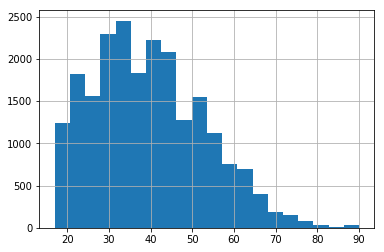

In [12]:
ml_age = ml['age']
ml_age.hist(normed = 0, histtype = 'stepfilled', bins = 20)

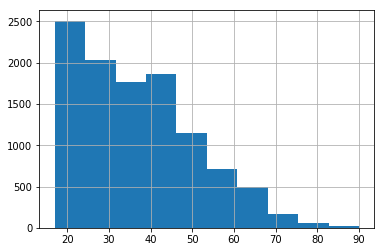

In [13]:
fm_age = fm['age']
fm_age.hist(normed = 0, histtype = 'stepfilled', bins = 10)

• доля p значений данных меньше или равна x p и

• оставшаяся доля (1 - р) больше, чем х р.

Это значение, x_p, представляет собой p-й квантиль или 100 × p-й процентиль. Например, сводка из 5 чисел определяется значениями xmin, Q1, Q2, Q3, xmax, где Q1 - 25 × p-й процентиль, Q2 - 50 × p-й процентиль, а Q3 - 75 × p процентиль. 

**3.3.2 Распределение данных**

Обобщение данных путем простого рассмотрения их среднего значения, медианы и дисперсии может быть опасным: одни и те же статистические данные могут описывать очень разные данные. Лучше всего проверить данные путем их проверки. Мы можем взглянуть на распределение данных, которое описывает, как часто появляется каждое значение (т. е. какова его частота).

Наиболее распространенным представлением распределения является гистограмма, которая представляет собой график, показывающий частоту каждого значения. Давайте покажем возраст работающих мужчин и женщин отдельно.

Вывод можно увидеть на рис. 3.1. Если мы хотим сравнить гистограммы, мы можем отобразить их наложение на одном графике следующим образом:

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


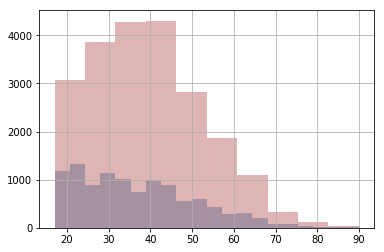

In [14]:
import seaborn as sns
fm_age.hist(normed = 0, histtype = 'stepfilled', alpha = .5, bins = 20)
ml_age.hist(normed = 0, histtype = 'stepfilled', alpha = .5, color = sns.desaturate("indianred", .75), bins = 10)

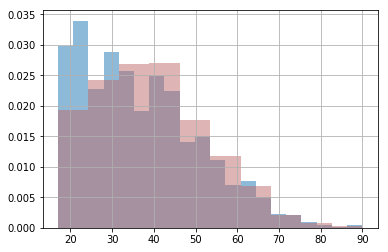

In [15]:
fm_age.hist(normed = 1, histtype = 'stepfilled', alpha = .5, bins = 20)
ml_age.hist(normed = 1, histtype = 'stepfilled', alpha = .5, bins = 10, color = sns.desaturate("indianred",
.75))

Рис.3.2 Гистограмма возраста работающих мужчин (в охре) и женщин (в фиолетовых) (слева). Гистограмма возраста работающих мужчин (в охре), женщин (в синем) и их пересечения (в фиолетовых) после нормализации образцов (справа)

Вывод можно увидеть на рис. 3.2 (слева). Обратите внимание, что мы визуализируем абсолютные значения числа людей в нашем наборе данных в соответствии с их возрастом (абсцисса гистограммы). Как побочный эффект, мы можем видеть, что мужчин в этих условиях гораздо больше, чем женщин.

Мы можем нормализовать частоты гистограммы путем разделения/нормализации числа выборок.  Нормализованная гистограмма называется функцией вероятности массы (PMF).

Это приводит к рис. 3.2 (справа), где мы можем наблюдать сопоставимый диапазон лиц (мужчин и женщин).

Кумулятивная функция распределения (CDF), или просто функция распределения, описывает вероятность того, что будет найдена вещественная случайная величина X с данным распределением вероятностей, имеющая значение, меньшее или равное x. Давайте покажем CDF распределения по возрасту для мужчин и женщин.

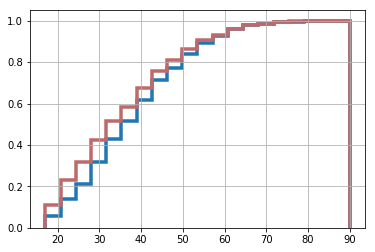

In [16]:
ml_age.hist(normed = 1, histtype = 'step', cumulative = True, linewidth = 3.5, bins = 20)
fm_age.hist(normed = 1, histtype = 'step', cumulative = True, linewidth = 3.5, bins = 20, color = sns.desaturate("indianred", .75))

Рис. 3.3 CDF возраста работающего мужчины (синим цветом)

и женские (в красном) образцы

Результат можно увидеть на рис. 3.3, который иллюстрирует CDF распределения по возрасту для мужчин и женщин.

**3.3.3 Исключение выбросовв**

Как упоминалось ранее, выбросы представляют собой выборки данных со значением, далеким от среднего значения. Для обнаружения выбросов могут быть определены различные правила, как показано ниже:

Вычисление выборок, которые далеки от медианы.
Вычисление выборок, значения которых превышают среднее значение на 2 или 3 стандартных отклонения.

Например, в нашем случае нас интересует возрастная статистика мужчин и женщин с высокими доходами, и мы видим, что в нашем наборе данных минимальный возраст составляет 17 лет, а максимальный-90 лет. Мы можем считать, что некоторые из этих выборок содержат ошибки или не нерепрезентабельны. Применяя предметные знания, мы фокусируемся на среднем возрасте (37, в нашем случае) до 72 и до 22 лет, а остальные рассматриваем как выбросы.

In [17]:
df2 = df.drop(df.index[(df.income == '>50K\n') & (df['age'] > df['age'].median() + 35) & (df['age'] > df['age'].median() -15)])
ml1_age = ml1['age'] 
fm1_age = fm1['age']
ml2_age = ml1_age.drop(ml1_age.index[ (ml1_age > df['age'].median() + 35) & (ml1_age > df['age'].median() - 15) ])
fm2_age = fm1_age.drop(fm1_age.index[ (fm1_age > df['age'].median() + 35) & (fm1_age > df['age'].median() - 15) ])

Мы можем проверить, как среднее значение и медиана изменились после очистки данных:

In [18]:
mu2ml = ml2_age.mean() 
std2ml = ml2_age.std() 
md2ml = ml2_age.median() 
mu2fm = fm2_age.mean() 
std2fm = fm2_age.std() 
md2fm = fm2_age.median()

print ("Men statistics:")
print ("Mean:", mu2ml, "Std:", std2ml)
print ("Median:", md2ml)
print ("Min:", ml2_age.min(), "Max:", ml2_age.max())

print ("Women statistics:")
print ("Mean:", mu2fm, "Std:", std2fm)
print ("Median:", md2fm)
print ("Min:", fm2_age.min(), "Max:", fm2_age.max())

Men statistics:
Mean: 44.317982123920615 Std: 10.019749857171412
Median: 44.0
Min: 19 Max: 72
Women statistics:
Mean: 41.877028181041844 Std: 10.036441807343714
Median: 41.0
Min: 19 Max: 72


Давайте представим, сколько выбросов удаляется из всех данных с помощью:

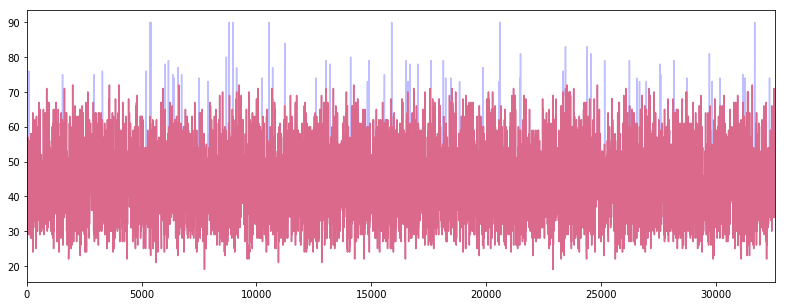

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13.4, 5)) 
df.age[(df.income == '>50K\n')].plot(alpha = .25, color = 'blue') 
df2.age[(df2.income == '>50K\n')].plot(alpha = .45, color = 'red')

Рис. 3.4 Красным цветом показаны очищенные данные без учета выбросов (синим цветом)

рис. 3.4 выбросы показаны синим цветом, а остальные данные-красным. Визуально мы можем подтвердить, что удалили основные выбросы из набора данных.
Далее мы видим, что при удалении выбросов разница между полами (мужчинами и женщинами) фактически уменьшилась. В нашем случае у мужчин было больше выбросов, чем у женщин. Если разница в средних значениях до удаления выбросов составляет 2,5, то после их удаления она немного снизилась до 2,44:

In [20]:
print ('The mean difference with outliers is: %4.2f. '% (ml_age.mean() - fm_age.mean()))
print ('The mean difference without outliers is: %4.2f.'% (ml2_age.mean() - fm2_age.mean()))

The mean difference with outliers is: 2.58. 
The mean difference without outliers is: 2.44.


Давайте рассмотрим разницу доходов мужчин и женщин в очищенном варианте с некоторыми более подробными деталями.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


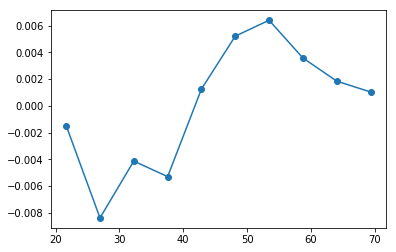

In [21]:
import numpy as np
countx, divisionx = np.histogram(ml2_age, normed = True)
county, divisiony = np.histogram(fm2_age, normed = True)
val = [(divisionx[i] + divisionx[i+1])/2 
       for i in range(len(divisionx) - 1)]
plt.plot(val, countx - county, 'o-')

Рис. 3.5 Различия мужчин и женщин с высоким доходом в зависимости от возраста

Результаты показаны на рис. 3.5. Можно видеть, что различия между мужскими и женскими показателями немного отрицательны до 42 лет и положительны после него. Следовательно, женщины, как правило, получают повышение (получают более 50 тыс.) раньше, чем мужчины.

**3.3.4 Измерение асимметрии: асимметрия и средний коэффициент асимметрии Пирсона**

Для одномерных данных формула асимметрии представляет собой статистику, измеряющую асимметрию набора из n выборок данных, xi:

![3.3](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/3.png?raw=true)

где μ-среднее значение, σ-стандартное отклонение, а n-количество точек данных.
Отрицательное отклонение указывает на то, что распределение “отклоняется влево” (оно распространяется больше влево, чем вправо). Можно увидеть, что асимметрия для нормального распределения равна нулю, и любые симметричные данные должны иметь асимметрию, равную нулю. Обратите внимание, что на асимметрию могут влиять выбросы! Более простой альтернативой является рассмотрение взаимосвязи между средним значением μ и медианным значением μ12.

In [22]:
def skewness(x):
    res = 0
    m = x.mean ()
    s = x.std ()
    for i in x:
        res += (i-m) * (i-m) * (i-m)
    res /= (len(x) * s * s * s)
    return res
print ("Skewness of the male population = ", skewness(ml2_age))
print ("Skewness of the female population is = ", skewness(fm2_age))

Skewness of the male population =  0.2664443838432819
Skewness of the female population is =  0.38633352491285977


То есть, женское население более склонно к отклонению, чем мужское, вероятно, поскольку мужчины могут быть более склонными к выходу на пенсию позже, чем женщины.
Средний коэффициент асимметрии Пирсона является более надежной альтернативой коэффициенту асимметрии и определяется следующим образом:

![Pearson’s median skewness coefficient](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/4.png?raw=true)

Есть много других определений асимметрии, которые не будут обсуждаться здесь. В нашем случае, если мы проверим коэффициент асимметрии Пирсона как для мужчин, так и для женщин, мы увидим, что разница между ними фактически увеличивается:

In [23]:
def pearson(x):
    return 3*(x.mean() - x.median())*x.std()
print ("Pearson’s coefficient of the male population = ", pearson(ml2_age))
print ("Pearson’s coefficient of the female population = ", pearson(fm2_age))

Pearson’s coefficient of the male population =  9.55830402220993
Pearson’s coefficient of the female population =  26.40672690728092


**3.3.4.1 Обсуждения**

Изучив данные, мы получили некоторые очевидные доказательства, которые, по-видимому, подтверждают наши первоначальные предположения. Например, средний возраст мужчин в нашем наборе данных составляет 39,4 года, а женщин-36,8 лет. При анализе заработной платы с высоким доходом средний возраст мужчин увеличился до 44,6 лет; а женщин - до 42,1 года. Когда данные были очищены от выбросов, мы получили средний возраст мужчин с высоким доходом: 44,3, а женщин: 41,8. Кроме того, гистограммы и другие статистические данные показывают асимметрию данных и тот факт, что женщины раньше продвигались по службе, чем мужчины, в целом.

**3.3.5 Непрерывное распределение**

Распределения, которые мы рассматривали до сих пор, основаны на эмпирических наблюдениях и поэтому называются эмпирическими распределениями. В качестве альтернативы мы можем быть заинтересованы в рассмотрении распределений, которые определяются непрерывной функцией и называются непрерывными распределениями. Помните, что мы определили PMF, fX(x), дискретной случайной величины X как fX(x) = P (X = x) для всех x. В случае непрерывной случайной величины X мы говорим о функции плотности вероятности (PDF), которая

![Fig. 3.6](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/5.png?raw=true)

Рис. 3.6 Экспоненциальный CDF (слева) и PDF (справа) с λ = 3,00

определяется как 

![Fx(x)=](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/6.png?raw=true)

для всех x. Существует много непрерывных распределений; здесь мы рассмотрим наиболее распространенные из них: экспоненциальное и нормальное распределения. 

3.3.5.1 Экспоненциальное распределение

Экспоненциальные распределения хорошо известны, так как они описывают интервал времени между наступлениями событий. Когда события с одинаковой вероятностью происходят в любое время, распределение времени наступления события имеет тенденцию к экспоненциальному распределению. CDF и PDF экспоненциального распределения определяются следующими уравнениями:

![CDF, PDF](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/7.png?raw=true)

Параметр λ определяет форму распределения. Пример приведен на рис. 3.6. Легко показать, что среднее значение распределения составляет ![1](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/8.png?raw=true), дисперсия равна ![2](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/9.png?raw=true), а медиана равна ![3](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/10.png?raw=true)

Заметим, что для небольшого числа выборок трудно увидеть, что точное эмпирическое распределение соответствует непрерывному распределению. Лучший способ наблюдать это соответствие-генерировать выборки из непрерывного распределения и проверять, соответствуют ли эти выборки данным. В качестве упражнения можно рассматривать дни рождения достаточно большой группы людей, сортируя их и вычисляя время наступления события в днях. Если вы построите график CDF времени наступления события, то увидите экспоненциальное распределение. Есть много реальных событий, которые могут быть описаны этим распределением, в том числе время, распада радиоактивных частиц; время, которое требуется до вашего следующего телефонного звонка; и время до дефолта (при оплате держателям долгов компании) в уменьшенной форме моделирования кредитного риска. Случайная величина X времени жизни некоторых батарей связана с функцией плотности вероятности вида: ![PDF(x) ](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/11.png?raw=true)

![Fig 3.7](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/12.png?raw=true)

Рис. 3.7. Нормальный PDF с μ = 6 и σ = 2

**3.3.5.2 Нормальное распределение**

Нормальное распределение, также называемое гауссовским распределением, является наиболее распространенным, поскольку оно представляет собой многие реальные явления: экономические, природные, социальные и другие. Некоторые известные примеры реальных явлений с нормальным распределением:

Размер живого организма (длина, рост, вес).

Длину волос, ногтей, зубов - биологических образцов.

Различные физиологические показатели (например, кровяное давление) и т. д.

Обычный CDF не имеет выражения закрытой формы, и его наиболее распространенным представлением является PDF:

![PDF(x) =](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/13.png?raw=true)

Параметр σ определяет форму распределения. Пример построения нормального распределения с μ = 6 и σ = 2 приведен на рис. 3.7.

**3.3.6 Плотность ядра**

Во многих реальных проблемах нас могут интересовать не параметры конкретного распределения данных, а просто непрерывное представление данных. В этом случае мы должны оценить распределение непараметрически (т. е. не делая никаких предположений о форме базового распределения), используя оценку плотности ядра. Представим себе, что мы имеем набор измерений данных, не зная их распределения, и нам нужно оценить непрерывное представление их распределения. В этом случае мы можем рассмотреть гауссово ядро для создания плотности вокруг данных. Рассмотрим набор случайных данных, созданных бимодальным нормальным распределением. Если мы рассмотрим гауссово ядро вокруг данных, сумма этих ядер может дать нам непрерывную функцию, которая при нормализации будет аппроксимировать плотность распределения:

In [24]:
x1 = np.random.normal(-1, 0.5, 15)
x2 = np.random.normal(6, 1, 10)
y = np.r_[x1, x2] 
x = np.linspace(min(y), max(y), 100)
s = 0.4 
kernels = np.transpose ([norm.pdf(x, yi, s) for yi in y])
plt.plot(x, kernels, 'k: ')
plt.plot(x, kernels.sum(1), 'r')
plt.plot(y, np.zeros(len(y)), 'bo', ms = 10)

NameError: name 'norm' is not defined

![Fig 3.8](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/14.png?raw=true)

Рис. 3.8. Суммированные функции ядра вокруг случайного набора точек (слева) и оценки плотности ядра с оптимальной полосой пропускания (справа) для нашего набора данных. Случайные данные показаны синим цветом, ядро - черным, а функция суммирования - красным
На рисунке 3.8 (слева) показан результат построения непрерывной функции из ядра суммирования. Фактически, библиотека SciPy3 реализует гауссовскую оценку плотности ядра, которая автоматически выбирает соответствующий параметр пропускной способности для ядра. Таким образом, окончательное построение оценки плотности будет получено путем: 

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


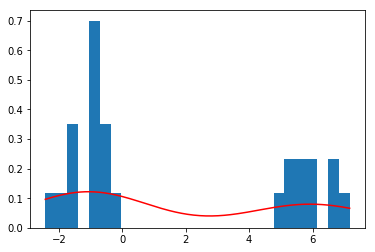

In [25]:
from scipy.stats import kde
density = kde.gaussian_kde(y)
xgrid = np.linspace(x.min(), x.max(), 200) 
plt.hist(y, bins = 28, normed = True) 
plt.plot(xgrid, density(xgrid), 'r-')

На рисунке 3.8 (справа) показан результат оценки плотности ядра для нашего примера.

**3.4 Оценка**

Важным аспектом при работе со статистическими данными является возможность использования оценок для аппроксимации значений неизвестных параметров набора данных. В этом разделе мы рассмотрим различные виды оценок (оценочное среднее, дисперсия, стандартная оценка и т.д.). 


**3.4.1 Выборочное и оценочное среднее, дисперсия и стандартные оценки**
В дальнейшем мы будем иметь дело с точечными оценками, которые представляют собой единичные численные оценки параметров популяции.


**3.4.1.1 Среднее значение**

Предположим, что мы знаем, что наши данные поступают из нормального распределения, а случайные выборки выглядят следующим образом: 
{0.33, −1.76, 2.34, 0.56, 0.89}. 
Вопрос в том, можем ли мы угадать среднее значение μ распределения? Одно приближение задается выборочным средним, x ̄.  Этот процесс называется оценкой, а статистика (например, выборочное среднее) называется оценщиком. В нашем случае среднее значение выборки равно 0,472, и это кажется логичным выбором для представления среднего значения распределения. Это не так очевидно, если мы добавим выборку со значением -465. В этом случае среднее значение выборки будет равно -77,11, что не похоже на среднее значение распределения. Причина заключается в том, что последнее значение, по-видимому, является выбросом по сравнению с остальной частью выборки. Чтобы избежать этого эффекта, мы можем попытаться сначала удалить выбросы, а затем оценить среднее значение; или мы можем использовать выборочную медиану в качестве оценки среднего значения распределения. Если выбросы отсутствуют, выборочное среднее значение x минимизирует следующую среднеквадратичную ошибку: 

![MSE](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/15.png?raw=true)

где n-количество раз, когда мы оцениваем среднее значение.

Давайте вычислим MSE набора случайных данных:

In [26]:
NTs = 200
mu = 0.0
var = 1.0
err = 0.0
NPs = 1000
for i in range(NTs):
    x = np.random.normal(mu, var, NPs)
    err += (x.mean()-mu)**2 
print ('MSE: ', err / NTs)

MSE:  0.0010543988573038052


**3.4.1.2 Дисперсия**

Если мы спросим себя, какова дисперсия, σ2, распределения X, аналогично мы можем использовать выборочную дисперсию в качестве оценки. Обозначим через σ 2 оценку выборочной дисперсии: 

![Variance](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/16.png?raw=true)

Для больших выборок эта оценка работает хорошо, но для небольшого числа выборок она смещена. В этих случаях лучшая оценка дается:

![Variance](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/17.png?raw=true)


**3.4.1.3 Стандартная Оценка**

Во многих реальных проблемах, когда мы хотим сравнить данные или оценить их корреляции или некоторые другие виды отношений, мы должны избегать данных, которые поступают в разных единицах измерения. Например, вес может быть в килограммах или граммах. Даже данные, поступающие в одних и тех же единицах измерения, могут принадлежать к разным распределениям. Нам нужно нормализовать их до стандартных оценок. Задавая набор данных как ряд значений, {xi }, мы преобразуем данные в стандартные оценки, вычитая среднее и разделяя их на стандартное отклонение:

![Standard Score](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/18.png?raw=true)

Обратите внимание, что эта мера безразмерна и ее распределение имеет среднее значение 0 и дисперсию 1. Она наследует "форму" набора данных: если X нормально распределен, то Z; Если X искажён, то Z.

**3.4.2 Ковариация и ранговая корреляция Пирсона и Спирмена**

Переменные данных могут выражать отношения. Например, страны, которые склонны инвестировать в научные исследования, также склонны вкладывать больше средств в образование и здравоохранение. Этот вид отношений зафиксирован ковариацией. 

![Fig 3.9](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/19.png?raw=true)

Рис.3.9 положительная корреляция между экономическим ростом и доходностью фондового рынка во всем мире (слева). Отрицательная корреляция между мировой добычей нефти и ценами на бензин во всем мире (справа)
 
**3.4.2.1 Ковариация**

Когда две переменные имеют одну и ту же тенденцию, мы говорим о ковариации. Рассмотрим два ряда, {xi } и {yi }. Сосредоточим данные относительно их среднего значения: dxi =xi −µX и DYI =yi-µY. Легко показать, что когда {xi} и {yi} изменяются вместе, их отклонения, как правило, имеют один и тот же знак. Ковариация определяется как среднее значение следующих продуктов: 

![Covariance](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/20.png?raw=true)

где n - длина обоих наборов. Тем не менее, саму ковариацию трудно интерпретировать.

**3.4.2.2 Корреляция и корреляция Пирсона**

Если мы нормализуем данные относительно их отклонения, которое приведёт их к стандартным оценкам; а затем умножим их, мы получим:

![Correlation and the Pearson’s Correlation](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/21.png?raw=true)

Среднее значение этого продукта ![Correlation and the Pearson’s Correlation](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/22.png?raw=true)

 Равнозначно, мы можем переписать ρ в терминах ковариации и таким образом получить корреляцию Пирсона:

![Correlation and the Pearson’s Correlation](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/23.png?raw=true)

Обратите внимание, что корреляция Пирсона всегда находится между -1 и +1, где величина зависит от степени корреляции. Если корреляция Пирсона равна 1 (или -1), это означает, что переменные идеально коррелированы (положительно или отрицательно) (см. рис. 3.9). Это означает, что одна переменная может очень хорошо предсказывать другую. Однако наличие ρ = 0 не обязательно означает, что переменные не коррелированы! Корреляция Пирсона охватывает корреляции первого порядка, но не нелинейные корреляции. Более того, она плохо работает при наличии выбросов.

![Fig.3.10 Anscombe configurations](https://github.com/AnnLar/Data-Science-3-Descriptive-Statistics/blob/master/24.png?raw=true)

**3.4.2.3 Ранговая корреляция Спирмена**

Ранговая корреляция Спирмена является решением проблемы устойчивости корреляции Пирсона, когда данные содержат выбросы. Основная идея заключается в использовании рангов отсортированных выборочных данных, а не самих значений. Например, в списке [4, 3, 7, 5], ранг 4 равен 2, так как он будет отображаться вторым в упорядоченном списке ([3, 4, 5, 7]). Корреляция Спирмена вычисляет корреляцию между рангами данных. Например, рассмотрим данные: X=[10, 20, 30, 40, 1000], и Y = [-70, -1000, -50, -10, -20], где у нас есть выброс в каждом наборе. Если мы вычислим ранги, они будут равны [1.0, 2.0, 3.0, 4.0, 5.0] и [2.0, 1.0, 3.0, 5.0, 4.0]. В качестве значения коэффициента Пирсона мы получаем 0,28, что не показывает большой корреляции между наборами. Однако коэффициент ранга Спирмена, фиксирующий корреляцию между рангами, дает в качестве конечного значения 0,80, подтверждая корреляцию между наборами. В качестве упражнения вы можете вычислить ранговые корреляции Пирсона и Спирмена для различных конфигураций Анскомба, показанных на рис. 3.10. Обратите внимание, могут ли линейные и нелинейные корреляции быть охвачены ранговыми корреляциями Пирсона и Спирмена. 


**3.5 Выводы**

В этой главе мы ознакомились с основными понятиями и процедурами описательной статистики для изучения набора данных. Как мы уже видели, это помогает нам понять эксперимент или набор данных в деталях и позволяет нам распределить перспективно данные. Мы ввели центральные измерения тенденции, такие как выборочное среднее значение и медиана; и меры изменчивости, такие как дисперсия и стандартное отклонение. Мы также обсудили, как эти меры могут быть затронуты выбросами. Чтобы углубиться в визуализацию набора данных, мы ввели гистограммы, квантили и процентили. Во многих ситуациях, когда значения являются непрерывными переменными, удобно использовать непрерывные распределения, наиболее распространенными из которых являются нормальное и экспоненциальное распределения. Преимущество большинства непрерывных распределений заключается в том, что мы можем иметь явное выражение для их PDF и CDF, а также среднее значение и дисперсию в терминах замкнутой формулы. Кроме того, мы узнали, как, используя плотность ядра, мы можем получить непрерывное представление распределения выборки. Наконец, мы обсудили, как оценить корреляцию и ковариацию наборов данных, где двумя наиболее популярными измерениями являются Ранговые корреляции Пирсона и Спирмена, на которые по-разному влияют выбросы набора данных.

 

Благодарности. Эта глава написана Петей Радевой и Лаурой Игуаль.

 

Рекомендации

1. А. Б. Дауни, «Вероятность и статистика для программистов», O’Reilly Media, 2011, ISBN-10: 1449307116.

2. Распределение вероятностей: дискретное и непрерывное, http://stattrek.com/probability-distributions/дискретно-continuous.aspx.